In [1]:
import os, math, subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import display

# some settings for displaying Pandas results
pd.set_option('display.width', 2000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.precision', 4)
pd.set_option('display.max_colwidth', -1)

# Load train and test data

In [2]:
# train
train_path = "home-credit-default-risk/application_train.csv"
pdf_train = pd.read_csv(train_path)
print("(rows, columns)", pdf_train.shape)
print("First 5 rows")
display(pdf_train.head(5))

# test
test_path = "home-credit-default-risk/application_test.csv"
pdf_test = pd.read_csv(test_path)
print("(rows, columns)", pdf_test.shape)
print("First 5 rows")
display(pdf_test.head(5))

# load meta data
meta_path = "../02_pandas/reports/report_application_train.csv"
pdf_meta = pd.read_csv(meta_path)
display(pdf_meta)

('(rows, columns)', (307511, 122))
First 5 rows


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0188,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.0830,0.2629,0.1394,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.0035,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.3113,0.6222,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0100,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.5559,0.7296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

('(rows, columns)', (48744, 121))
First 5 rows


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.0188,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.7526,0.7897,0.1595,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.0358,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.5650,0.2917,0.4330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.0191,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.6998,0.6110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.0

,name,sub_type,n_distinct,n_miss,n_negative,n_zeros,25%,50%,75%,count,max,mean,min,std,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9
0,SK_ID_CURR,int64,307511 (100.00%),0 (0.00%),0 (0.00%),0 (0.00%),189145.5000,278202.0000,367142.5000,307511.0,4.5626e+05,2.7818e+05,1.0000e+05,102790.1753,326682,414578,432657,346257,169928,228494,305986,450918,393627,121604
1,TARGET,int64,2 (0.00%),0 (0.00%),0 (0.00%),282686 (91.93%),0.0000,0.0000,0.0000,307511.0,1.0000e+00,8.0729e-02,0.0000e+00,0.2724,0,1,0,0,1,0,0,1,0,0
2,NAME_CONTRACT_TYPE,object,2 (0.00%),0 (0.00%),0 (0.00%),0 (0.00%),0.0000,0.0000,0.0000,0.0,0.0000e+00,0.0000e+00,0.0000e+00,0.0000,Cash loans,Cash loans,Revolving loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans
3,CODE_GENDER,object,3 (0.00%),0 (0.00%),0 (0.00%),0 (0.00%),0.0000,0.0000,0.0000,0.0,0.0000e+00,0.0000e+00,0.0000e+00,0.0000,M,M,M,M,M,F,M,F,F,F
4,FLAG_OWN_CAR,object,2 (0.00%),0 (0.00%),0 (0.00%),0 (0.00%),0.0000,0.0000,0.0000,0.0,0.0000e+00,0.0000e+00,0.0000e+00,0.0000,Y,Y,N,N,N,N,N,Y,N,N
5,FLAG_OWN_REALTY,object,2 (0.00%),0 (0.00%),0 (0.00%),0 (0.00%),0.0000,0.0000,0.0000,0.0,0.0000e+00,0.0000e+00,0.0000e+00,0.0000,Y,N,Y,Y,Y,Y,Y,N,Y,Y
6,CNT_CHILDREN,int64,15 (0.00%),0 (0.00%),0 (0.00%),215371 (70.04%),0.0000,0.0000,1.0000,307511.0,1.9000e+01,4.1705e-01,0.0000e+00,0.7221,0,1,0,0,0,0,0,1,2,0
7,AMT_INCOME_TOTAL,float64,2548 (0.83%),0 (0.00%),0 (0.00%),0 (0.00%),112500.0000,147150.0000,202500.0000,307511.0,1.1700e+08,1.6880e+05,2.5650e+04,237123.1463,166500.0,450000.0,157500.0,135000.0,202500.0,117000.0,90000.0,180000.0,157500.0,90000.0
8,AMT_CREDIT,float64,5603 (1.82%),0 (0.00%),0 (0.00%),0 (0.00%),270000.0000,513531.0000,808650.0000,307511.0,4.0500e+06,5.9903e+05,4.5000e+04,402490.7770,254700.0,1381113.0,450000.0,1764000.0,203760.0,254700.0,538704.0,630000.0,679500.0,755190.0
9,AMT_ANNUITY,float64,13672 (4.45%),12 (0.00%),0 (0.00%),0 (0.00%),16524.0000,24903.0000,34596.0000,307499.0,2.5803e+05,2.7109e+04,1.6155e+03,14493.7373,25191.0,39712.5,22500.0,48510.0,16227.0,25191.0,26046.0,23274.0,36202.5,36459.0


# Binary vs one-hot encoding features

In [3]:
ls_ignore_cols = [
    "FLAG_MOBIL",
    "FLAG_CONT_MOBILE",
    "REG_CITY_NOT_LIVE_CITY",
    "FLAG_DOCUMENT_2",
    "FLAG_DOCUMENT_4",
    "FLAG_DOCUMENT_7",
    "FLAG_DOCUMENT_10",
    "FLAG_DOCUMENT_11",
    "FLAG_DOCUMENT_12",
    "FLAG_DOCUMENT_13",
    "FLAG_DOCUMENT_14",
    "FLAG_DOCUMENT_15",
    "FLAG_DOCUMENT_16",
    "FLAG_DOCUMENT_17",
    "FLAG_DOCUMENT_18",
    "FLAG_DOCUMENT_19",
    "FLAG_DOCUMENT_20",
    "FLAG_DOCUMENT_21",
]

In [4]:
%%time
def gen_binary_one_hot_feat(pdf_input):

    pdf_data = pdf_input.copy()
    select_features = []
    dict_feat = {
        "binary_default": {
            "NAME_CONTRACT_TYPE": ['Cash loans', 'Revolving loans'],
            "CODE_GENDER": ['M', 'F', 'XNA'],
            "FLAG_OWN_CAR": ['Y', 'N'],
            "FLAG_OWN_REALTY": ['Y', 'N'],
            "EMERGENCYSTATE_MODE": ['Yes', 'No'],
        },
        "binary": [
            "FLAG_EMP_PHONE",
            "FLAG_WORK_PHONE",
            "FLAG_PHONE",
            "FLAG_EMAIL",
            "REG_REGION_NOT_LIVE_REGION",
            "REG_REGION_NOT_WORK_REGION",
            "LIVE_REGION_NOT_WORK_REGION",
            "REG_CITY_NOT_WORK_CITY",
            "LIVE_CITY_NOT_WORK_CITY",
            "FLAG_DOCUMENT_3",
            "FLAG_DOCUMENT_5",
            "FLAG_DOCUMENT_6",
            "FLAG_DOCUMENT_8",
            "FLAG_DOCUMENT_9",
            "REGION_RATING_CLIENT",
            "REGION_RATING_CLIENT_W_CITY",
        ],
        "onehot": {
            "NAME_TYPE_SUITE": ["Unaccompanied", "Family", "Spouse, partner", "Children", "Other_A", "Other_B", "Group of people"],
            "NAME_INCOME_TYPE": ["Working", "State servant", "Commercial associate", "Pensioner", "Unemployed", "Student", "Businessman", "Maternity leave"],
            "NAME_EDUCATION_TYPE": ["Secondary / secondary special", "Higher education", "Incomplete higher", "Lower secondary", "Academic degree"],
            "NAME_FAMILY_STATUS": ["Single / not married", "Married", "Civil marriage", "Widow", "Separated", "Unknown"],
            "NAME_HOUSING_TYPE": ["House / apartment", "Rented apartment", "With parents", "Municipal apartment", "Office apartment", "Co-op apartment"],
            "OCCUPATION_TYPE": ["Laborers", "Core staff", "Accountants", "Managers", "Drivers", "Sales staff", "Cleaning staff", "Cooking staff", "Private service staff", "Medicine staff", "Security staff", "High skill tech staff", "Waiters/barmen staff", "Low-skill Laborers", "Realty agents", "Secretaries", "IT staff", "HR staff"],
            "ORGANIZATION_TYPE": ["Business Entity Type 3", "School", "Government", "Religion", "Other", "XNA", "Electricity", "Medicine", "Business Entity Type 2", "Self-employed", "Transport: type 2", "Construction", "Housing", "Kindergarten", "Trade: type 7", "Industry: type 11", "Military", "Services", "Security Ministries", "Transport: type 4", "Industry: type 1", "Emergency", "Security", "Trade: type 2", "University", "Transport: type 3", "Police", "Business Entity Type 1", "Postal", "Industry: type 4", "Agriculture", "Restaurant", "Culture", "Hotel", "Industry: type 7", "Trade: type 3", "Industry: type 3", "Bank", "Industry: type 9", "Insurance", "Trade: type 6", "Industry: type 2", "Transport: type 1", "Industry: type 12", "Mobile", "Trade: type 1", "Industry: type 5", "Industry: type 10", "Legal Services", "Advertising", "Trade: type 5", "Cleaning", "Industry: type 13", "Trade: type 4", "Telecom", "Industry: type 8", "Realtor", "Industry: type 6"],
            "FONDKAPREMONT_MODE": ["reg oper account", "org spec account", "reg oper spec account", "not specified"],
            "HOUSETYPE_MODE": ["block of flats", "terraced house", "specific housing"],
            "WALLSMATERIAL_MODE": ["Stone, brick", "Block", "Panel", "Mixed", "Wooden", "Others", "Monolithic"],            
        }
    }

    for k in dict_feat:
        if k == "binary_default":
            for cname in dict_feat[k]:
                # get default value
                default_val = dict_feat[k][cname][0]

                # convert category to binary
                feat_name = "is_" + cname
                select_features.append(feat_name)
                pdf_data[feat_name] = pdf_data[cname].apply(lambda x: int(x == default_val))
        elif k == "binary":
            # rename only
            for cname in dict_feat[k]:
                feat_name = "is_" + cname
                select_features.append(feat_name)
                pdf_data[feat_name] = pdf_data[cname]
        elif k == "onehot":
            for cname in dict_feat[k]:
                ls_vals = dict_feat[k][cname]
                for val in ls_vals:
                    try:
                        new_name = "{}_{}".format(cname, val.replace(" ", "_")\
                                                              .replace(":", "_")\
                                                              .replace("/", "_")\
                                                              .replace("-", "_"))

                        select_features.append(new_name)
                        pdf_data[new_name] = pdf_data[cname].apply(lambda x: int(x == val))
                    except Exception as err:
                        print("One hot for {}-{}. Error: {}".format(cname, val, err))                        
                
    return pdf_data[["SK_ID_CURR"] + select_features]


# for train feat
pdf01_baseline = gen_binary_one_hot_feat(pdf_train)

# for test feat
pdf02_baseline = gen_binary_one_hot_feat(pdf_test)

# print results
print(pdf01_baseline.shape, pdf02_baseline.shape)
display(pdf01_baseline.head().T)

((307511, 144), (48744, 144))


,0,1,2,3,4
SK_ID_CURR,100002,100003,100004,100006,100007
is_FLAG_EMP_PHONE,1,1,1,1,1
is_FLAG_WORK_PHONE,0,0,1,0,0
is_FLAG_PHONE,1,1,1,0,0
is_FLAG_EMAIL,0,0,0,0,0
is_REG_REGION_NOT_LIVE_REGION,0,0,0,0,0
is_REG_REGION_NOT_WORK_REGION,0,0,0,0,0
is_LIVE_REGION_NOT_WORK_REGION,0,0,0,0,0
is_REG_CITY_NOT_WORK_CITY,0,0,0,0,1
is_LIVE_CITY_NOT_WORK_CITY,0,0,0,0,1


CPU times: user 2min 35s, sys: 3.67 s, total: 2min 38s
Wall time: 17.5 s


# keep columns

In [5]:
ls_continuous_name = pdf_meta[pdf_meta["sub_type"] == "float64"]["name"].tolist()
print(len(ls_continuous_name))

65


In [6]:
# for train feat
pdf11_baseline = pdf_train[["SK_ID_CURR"] + ls_continuous_name].copy()

# for test feat
pdf12_baseline = pdf_test[["SK_ID_CURR"] + ls_continuous_name].copy()

# print results
print(pdf11_baseline.shape, pdf12_baseline.shape)
display(pdf11_baseline.head().T)

((307511, 66), (48744, 66))


,0,1,2,3,4
SK_ID_CURR,100002.0000,1.0000e+05,100004.0000,100006.0000,100007.0000
AMT_INCOME_TOTAL,202500.0000,2.7000e+05,67500.0000,135000.0000,121500.0000
AMT_CREDIT,406597.5000,1.2935e+06,135000.0000,312682.5000,513000.0000
AMT_ANNUITY,24700.5000,3.5698e+04,6750.0000,29686.5000,21865.5000
AMT_GOODS_PRICE,351000.0000,1.1295e+06,135000.0000,297000.0000,513000.0000
REGION_POPULATION_RELATIVE,0.0188,3.5410e-03,0.0100,0.0080,0.0287
DAYS_REGISTRATION,-3648.0000,-1.1860e+03,-4260.0000,-9833.0000,-4311.0000
OWN_CAR_AGE,NaN,NaN,26.0000,NaN,NaN
CNT_FAM_MEMBERS,1.0000,2.0000e+00,1.0000,2.0000,1.0000
EXT_SOURCE_1,0.0830,3.1127e-01,NaN,NaN,NaN


# convert days to years

In [7]:
# The numbers in the DAYS_BIRTH column are negative because they are recorded relative to the current loan application. 
# To see these stats in years, we can mutliple by -1 and divide by the number of days in a year:
pdf11_baseline["BIRTH_YEAR"] = pdf_train["DAYS_BIRTH"] / -365
pdf12_baseline["BIRTH_YEAR"] = pdf_test["DAYS_BIRTH"] / -365

# similarly
pdf11_baseline["REGISTRATION_YEAR"] = pdf_train["DAYS_REGISTRATION"] / -365
pdf12_baseline["REGISTRATION_YEAR"] = pdf_test["DAYS_REGISTRATION"] / -365

# similarly
pdf11_baseline["ID_PUBLISH_YEAR"] = pdf_train["DAYS_ID_PUBLISH"] / -365
pdf12_baseline["ID_PUBLISH_YEAR"] = pdf_test["DAYS_ID_PUBLISH"] / -365

# similarly
pdf11_baseline["LAST_PHONE_CHANGE_YEAR"] = pdf_train["DAYS_LAST_PHONE_CHANGE"] / -365
pdf12_baseline["LAST_PHONE_CHANGE_YEAR"] = pdf_test["DAYS_LAST_PHONE_CHANGE"] / -365

# handling DAYS_EMPLOYED

In [8]:
pdf_train["DAYS_EMPLOYED"].describe()

count    307511.0000
mean     63815.0459 
std      141275.7665
min     -17912.0000 
25%     -2760.0000  
50%     -1213.0000  
75%     -289.0000   
max      365243.0000
Name: DAYS_EMPLOYED, dtype: float64

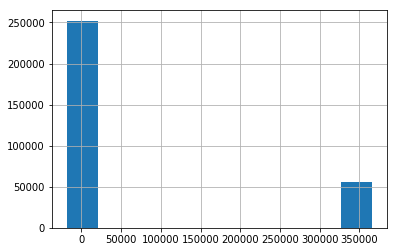

In [9]:
pdf_train["DAYS_EMPLOYED"].hist()
plt.show()

In [10]:
# check anomaly
anom = pdf_train[pdf_train["DAYS_EMPLOYED"] == 365243]
non_anom = pdf_train[pdf_train["DAYS_EMPLOYED"] != 365243]
print("The non-anomalies default on %0.2f%% of loans" % (100 * non_anom["TARGET"].mean()))
print("The anomalies default on %0.2f%% of loans" % (100 * anom["TARGET"].mean()))
print("There are %d anomalous days of employment" % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


In [11]:
def handling_days_employed(pdf_input, pdf_output):
    # Create an anomalous flag column
    pdf_output["DAYS_EMPLOYED_ANOM"] = pdf_input["DAYS_EMPLOYED"] == 365243

    # Replace the anomalous values with nan
    pdf_output["DAYS_EMPLOYED"] = pdf_input["DAYS_EMPLOYED"].replace({365243: np.nan})

    # Calculate years employed
    pdf_output["YEARS_EMPLOYED"] = pdf_output["DAYS_EMPLOYED"] / -365

    return pdf_output


pdf11_baseline = handling_days_employed(pdf_train, pdf11_baseline)
pdf12_baseline = handling_days_employed(pdf_test, pdf12_baseline)


# save features

In [12]:
%%time
def store_features(pdf_train, pdf_test, fname):
    print(pdf_train.shape, pdf_test.shape)
    fname = os.path.join("features", "{}.pkl.bz2".format(fname))
    pdf_out = pd.concat([pdf_train, pdf_test]).reset_index(drop=True)
    pdf_out.to_pickle(fname, compression="bz2")
    print("Store features completed!")

store_features(pdf01_baseline, pdf02_baseline, "baseline")
store_features(pdf11_baseline, pdf12_baseline, "baseline_extend")

((307511, 144), (48744, 144))
Store features completed!
((307511, 73), (48744, 73))
Store features completed!
CPU times: user 31 s, sys: 1.69 s, total: 32.7 s
Wall time: 26.6 s
